In [17]:
import os, sys
import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
import pylab

import itertools
from itertools import product
import json

In [18]:
def get_cpl_lyr_df_for_given_cstr(units_df, lyr_df, cstr, prs_df_dir):
    tmp = pd.DataFrame()
    
    visp_units = units_df[units_df.ecephys_structure_acronym ==cstr].index.values
    cstr_lyr = lyr_df.loc[list(units_df[units_df.ecephys_structure_acronym ==cstr].peak_channel_id.values.astype(str))]
    cstr_lyr.columns = ['peak_channel_id','layer']
    cstr_lyr['unit_id'] = visp_units
    
    for fname in os.listdir(prs_df_dir):
        if cstr != 'VISp':
            if expt_id + '_' + cstr + '_' in fname:
                #print(fname)
                tmp_pd = pd.read_pickle(os.path.join(prs_df_dir,fname))
                tmp = pd.concat((tmp,tmp_pd),sort=False)
        else:
            tmp_pd = pd.read_pickle(os.path.join(prs_df_dir,fname))
            tmp = pd.concat((tmp,tmp_pd),sort=False)
    
    tmp.index = tmp['unit_id'].values   
    tmp = pd.merge(cstr_lyr, tmp, on=['unit_id'])
    tmp1 = tmp.sort_values('layer')
    
    return tmp1

In [19]:
def plot_cpl_matrix_hm(src_df, tgt_df, src_cstr, tgt_cstr, figs_savedir=None):
    xv = np.where(np.diff(src_df.layer.values))[0]+0.5
    yv = np.where(np.diff(tgt_df.layer.values))[0]+0.5
    src_units = src_df.unit_id.values
    if len(src_units)>0:
        cpl_matrix = tgt_df[src_units].values.astype(float)
        max_cpl = np.amax(np.abs(cpl_matrix))
        fig,ax = plt.subplots(1,1, figsize = (15,10))
        plt.imshow(cpl_matrix, aspect='auto', cmap = 'bwr', vmin = -max_cpl, vmax = max_cpl)
        
        ax.set_yticks(range(cpl_matrix.shape[0]))
        ax.set_yticklabels(tgt_df.layer.values,fontsize=10,rotation=0)
        
        ax.set_xticks(range(cpl_matrix.shape[1]))
        ax.set_xticklabels(src_df.layer.values,fontsize=10,rotation=0)
        
        ax.vlines(xv, 0, 1, transform=ax.get_xaxis_transform(), color='k')
        ax.hlines(yv, 0, 1, transform=ax.get_yaxis_transform(), color='k')
        plt.colorbar()
        
        plt.xlabel('From ' + src_cstr, fontsize = 30)
        plt.ylabel('To ' + tgt_cstr, fontsize = 30, rotation = 90)
        
        plt.tight_layout()
        if figs_savedir is not None:
            fig_savename = os.path.join(figs_savedir, 'from_' + src_cstr + '_to_' + tgt_cstr + '.png')
            #plt.savefig(fig_savename)
            #plt.close()
        plt.show()
        
        return cpl_matrix

In [20]:
def plot_diff_cpl_matrix(src_df, tgt_df, src_cstr, tgt_cstr, cpl_mat_dict_p1, cpl_mat_dict_p2, flag_norm = True, figs_savedir=None):
    
    m2 = cpl_mat_dict_p2[tgt_cstr,src_cstr]
    m1 = cpl_mat_dict_p1[tgt_cstr,src_cstr]
    
    if flag_norm:
        tmp_diff_mat = m2/np.amax(np.abs(m2)) - m1/np.amax(np.abs(m1))
    else:
        tmp_diff_mat = m2 - m1
    
    xv = np.where(np.diff(src_df.layer.values))[0]+0.5
    yv = np.where(np.diff(tgt_df.layer.values))[0]+0.5
    src_units = src_df.unit_id.values
    
    if len(src_units)>0:
        max_cpl = np.amax(np.abs(tmp_diff_mat))
        fig,ax = plt.subplots(1,1, figsize = (15,10))
        plt.imshow(tmp_diff_mat, aspect='auto', cmap = 'bwr', vmin = -max_cpl, vmax = max_cpl)
        
        ax.set_yticks(range(tmp_diff_mat.shape[0]))
        ax.set_yticklabels(tgt_df.layer.values,fontsize=10,rotation=0)
        
        ax.set_xticks(range(tmp_diff_mat.shape[1]))
        ax.set_xticklabels(src_df.layer.values,fontsize=10,rotation=0)
        
        ax.vlines(xv, 0, 1, transform=ax.get_xaxis_transform(), color='k')
        ax.hlines(yv, 0, 1, transform=ax.get_yaxis_transform(), color='k')
        plt.colorbar()
        
        plt.xlabel('From ' + src_cstr, fontsize = 30)
        plt.ylabel('To ' + tgt_cstr, fontsize = 30, rotation = 90)
        
        plt.tight_layout()
        if figs_savedir is not None:
            fig_savename = os.path.join(figs_savedir, 'from_' + src_cstr + '_to_' + tgt_cstr + '.png')
            #plt.savefig(fig_savename)
            #plt.close()
        plt.show()
        
        return tmp_diff_mat

VISp VISp /Users/Ram/Dropbox/VC_NP_sklearn_mod/sandbox_save_prs/715093703/VISp/static_gratings/t1_0.05_t2_0.15_dt_0.005/max_test_corr /Users/Ram/Dropbox/VC_NP_sklearn_mod/sandbox_save_prs/715093703/VISp/static_gratings/t1_0.05_t2_0.15_dt_0.005/max_test_corr


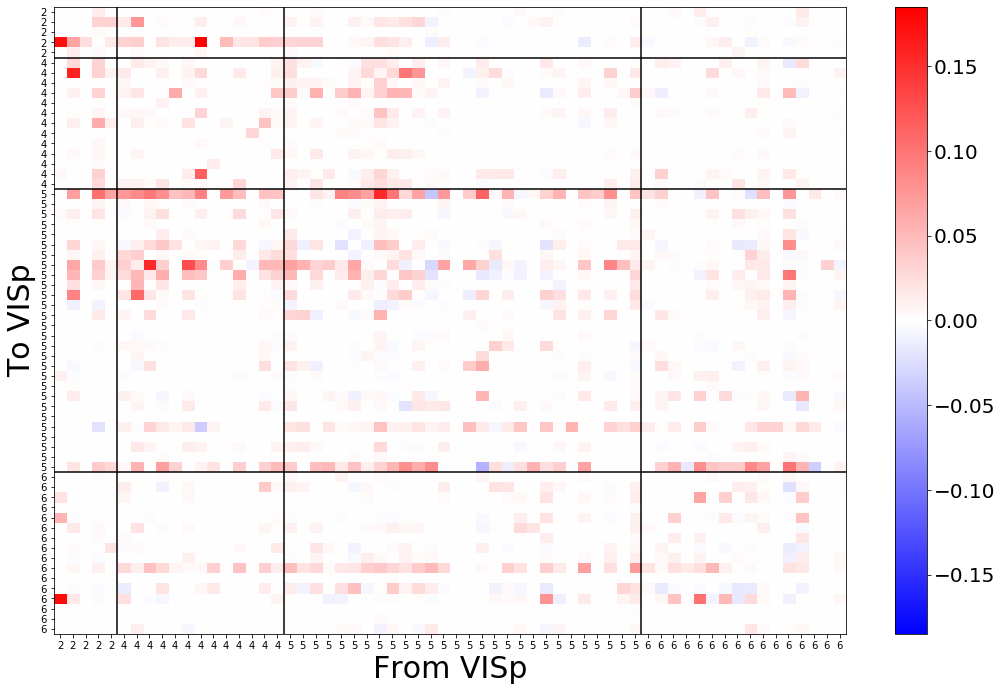

VISp VISl /Users/Ram/Dropbox/VC_NP_sklearn_mod/sandbox_save_prs/715093703/VISp/static_gratings/t1_0.05_t2_0.15_dt_0.005/max_test_corr /Users/Ram/Dropbox/VC_NP_sklearn_copy/glm_prs_with_vis_stim_for_cstr_corrected_scaling/715093703/VISl/static_gratings/dt_0.025/max_test_corr


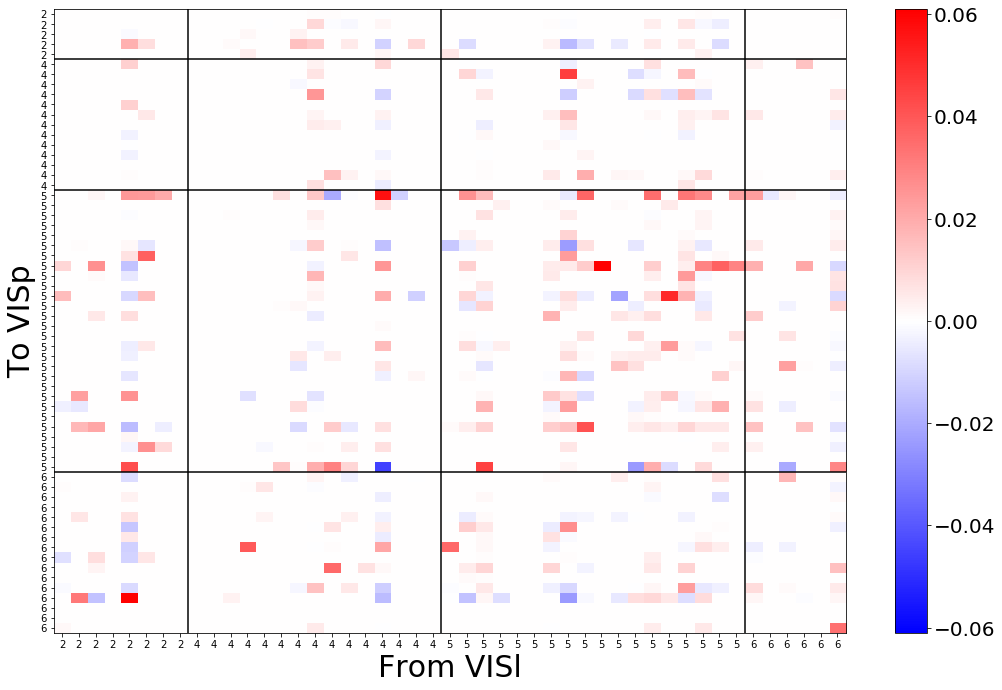

In [21]:
#units_df_basedir = 'Y:/rami/Research/VC_NP_v2/units_dfs'
#basedir = 'Y:/rami/Research/VC_NP_sklearn/glm_prs_with_vis_stim_for_cstr_smoothed'
#basedir = 'Y:/rami/Research/VC_NP_sklearn/glm_prs_no_vis_stim_for_cstr_smoothed'

units_df_basedir = '/Users/Ram/Dropbox/VC_NP_sklearn_copy/units_dfs'


expt_id_list = ['715093703']#['719161530']#['715093703']#['719161530']#['715093703'] #,'719161530'
split_frac = 0.5
stim_name = 'static_gratings'

basedir = '/Users/Ram/Dropbox/VC_NP_sklearn_mod/sandbox_save_prs'

tmp_src_basedir = '/Users/Ram/Dropbox/VC_NP_sklearn_copy/glm_prs_with_vis_stim_for_cstr_corrected_scaling'
tmp_dt = 0.025

vis_cols = ['VISp','VISl']#['VISp','VISam','VISl']#['LGd','LP','VISam','VISpm','VISp','VISl','VISal','VISrl']
list_of_lists = [vis_cols, vis_cols]
all_combs = list(itertools.product(*list_of_lists))

bin_dt = 0.005
bin_start = 0.05 #0.05#0.05
bin_end = 0.15 #0.15#0.15

cpl_mat_dict_p1 = {}

for expt_id in expt_id_list:
    #figs_savedir = os.path.join(basedir, expt_id, 'Figures')
    #figs_savedir = os.path.join(basedir, expt_id, 'dt_' + str(dt),'Figures')
    #if not os.path.exists(figs_savedir):
    #    os.makedirs(figs_savedir)
    for cc, comb in enumerate([all_combs[jj] for jj in [0,1]]):
        #try:
        tgt_cstr = comb[0]
        src_cstr = comb[1]

        units_savename = os.path.join(units_df_basedir,expt_id + '_units_df.pkl')
        units_df = pd.read_pickle(units_savename)

        #lyrs_dir = 'Y:/rami/data/NP_VC_data/layer_est_from_Jung/'
        lyrs_dir = '/Users/Ram/Dropbox/VC_NP_sklearn_copy/layer_est_from_Jung/'
        lyr_fname = os.path.join(lyrs_dir,expt_id+'_layer.json')
        with open(lyr_fname) as datafile:
            data = json.load(datafile)
        lyr_df = pd.DataFrame(data.items(), index = data.keys())
        
        if src_cstr != 'VISp':
            src_prs_df_dir = os.path.join(tmp_src_basedir, expt_id, src_cstr, stim_name, 'dt_'+str(tmp_dt), 'max_test_corr')
        else:
            src_prs_df_dir =  os.path.join(basedir, expt_id, src_cstr, \
           stim_name, 't1_'+str(bin_start) + '_t2_'+str(bin_end) + '_dt_'+str(bin_dt), 'max_test_corr')

        tgt_prs_df_dir =  os.path.join(basedir, expt_id, tgt_cstr, \
       stim_name, 't1_'+str(bin_start) + '_t2_'+str(bin_end) + '_dt_'+str(bin_dt), 'max_test_corr')
        
        print(tgt_cstr, src_cstr, tgt_prs_df_dir, src_prs_df_dir)

        src_tmp = get_cpl_lyr_df_for_given_cstr(units_df, lyr_df, src_cstr, src_prs_df_dir)
        tgt_tmp = get_cpl_lyr_df_for_given_cstr(units_df, lyr_df, tgt_cstr, tgt_prs_df_dir)

        cpl_mat = plot_cpl_matrix_hm(src_tmp, tgt_tmp, src_cstr, tgt_cstr, figs_savedir=None)#figs_savedir)
        cpl_mat_dict_p1[tgt_cstr,src_cstr] = cpl_mat
        #except Exception as e:
        #    print(e)
            

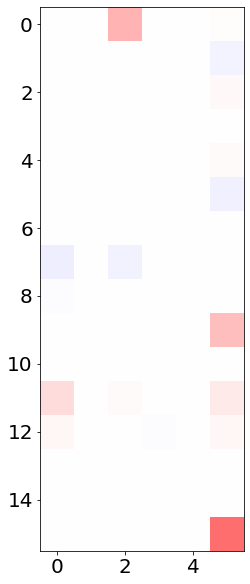

In [97]:
plt.figure(figsize = (5,10))
plt.imshow(tmp_df.values.astype(float), cmap = 'bwr', vmin = -0.06, vmax = 0.06)
plt.show()

In [189]:
def make_plot_on_gs(arr, fig, gs0, cmap_val = 'magma', max_val = None):
    ax0 = fig.add_subplot(gs0)
    if max_val is not None:
        im0 = ax0.imshow(arr, cmap = cmap_val, vmin = 0, vmax = max_val)
    else:
        im0 = ax0.imshow(arr, cmap = cmap_val)
        
    divider = make_axes_locatable(ax0)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im0, cax=cax, orientation='vertical')

In [212]:
bin_start = 0.15
bin_end = 0.25

src_cstr = 'VISl'
tgt_cstr = 'VISp'

if src_cstr != 'VISp':
    src_prs_df_dir = os.path.join(tmp_src_basedir, expt_id, src_cstr, stim_name, 'dt_'+str(tmp_dt), 'max_test_corr')
else:
    src_prs_df_dir =  os.path.join(basedir, expt_id, src_cstr, \
           stim_name, 't1_'+str(bin_start) + '_t2_'+str(bin_end) + '_dt_'+str(bin_dt), 'max_test_corr')

tgt_prs_df_dir =  os.path.join(basedir, expt_id, tgt_cstr, \
stim_name, 't1_'+str(bin_start) + '_t2_'+str(bin_end) + '_dt_'+str(bin_dt), 'max_test_corr')

print(tgt_cstr, src_cstr, tgt_prs_df_dir, src_prs_df_dir)

src_tmp = get_cpl_lyr_df_for_given_cstr(units_df, lyr_df, src_cstr, src_prs_df_dir)
tgt_tmp = get_cpl_lyr_df_for_given_cstr(units_df, lyr_df, tgt_cstr, tgt_prs_df_dir)

VISp VISl /Users/Ram/Dropbox/VC_NP_sklearn_mod/sandbox_save_prs/715093703/VISp/static_gratings/t1_0.15_t2_0.25_dt_0.005/max_test_corr /Users/Ram/Dropbox/VC_NP_sklearn_copy/glm_prs_with_vis_stim_for_cstr_corrected_scaling/715093703/VISl/static_gratings/dt_0.025/max_test_corr


In [213]:
print(src_tmp.shape, tgt_tmp.shape)
src_tmp.head()

(47, 1045) (62, 1048)


,peak_channel_id,layer,unit_id,alpha_val,mse,nnz_coef,train_corr,test_corr,950910319,950910352,...,110,111,112,113,114,115,116,117,118,119
46,850260531,2,950941256,0.00103549,0.122274,194,0.227981,0.199906,-0,-0.00231801,...,4.60535e-17,-0,-0,0,0,0,0,-0,-0,-0
39,850260513,2,950940718,0.00072782,0.0529169,183,0.271432,0.240918,0,0,...,-0.00146212,0.00026574,7.47996e-05,2.386e-05,4.84809e-06,0,0.00109158,-0.000448596,-0,-0
40,850260511,2,950940753,0.000519987,0.0345663,143,0.358265,0.308548,0,0,...,0,0,0,0,0,-0,-0,0,-0,-0
41,850260521,2,950942304,0.000463458,0.0118,104,0.238424,0.168419,-0,-0,...,0,5.21517e-08,0,-0,-0,-2.59699e-12,-0,0,-0,0
45,850260533,2,950941060,0.000701225,0.156411,248,0.651736,0.640173,0.00219185,-0.00545749,...,0,0,0,0,0,0,0,0,0,0


In [214]:
for lyr in [2,4,5,6]:
    print(len(src_tmp[src_tmp.layer==lyr].unit_id.values))

for lyr in [2,4,5,6]:
    print(len(tgt_tmp[tgt_tmp.layer==lyr].unit_id.values))

8
15
18
6
5
13
28
16


In [215]:
mean_lyr_pos = np.zeros((8,8))
nnz_lyr_pos = np.zeros((4,4))
nnz_lyr_neg = np.zeros((4,4))

for jj,src_lyr in enumerate([2,4,5,6]):
    src_units = src_tmp[src_tmp.layer==src_lyr].unit_id.values
    tmp_df_main = tgt_tmp[list(src_units)]
    for ii,tgt_lyr in enumerate([2,4,5,6]):
        tmp_df = tmp_df_main.iloc[np.where(tgt_tmp.layer==tgt_lyr)[0],:]
        nsyn_tot = len(~np.isnan(tmp_df.values.astype(float).flatten()))#tmp_df.shape[0]*tmp_df.shape[1]
        
        mean_lyr_pos[ii,jj] = np.nanmean(tmp_df[tmp_df>0].values.astype(float).flatten())
        mean_lyr_pos[ii+4,jj+4] = np.nanmean(tmp_df[tmp_df<0].values.astype(float).flatten())
        
        nnz_pos = np.count_nonzero(~np.isnan(tmp_df[tmp_df>0].values.astype(float).flatten()))
        nnz_neg = np.count_nonzero(~np.isnan(tmp_df[tmp_df<0].values.astype(float).flatten()))
        nnz_lyr_pos[ii,jj] = nnz_pos/nsyn_tot
        nnz_lyr_neg[ii,jj] = nnz_neg/nsyn_tot

//anaconda/envs/neuropixels_get_data_Nov2019/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


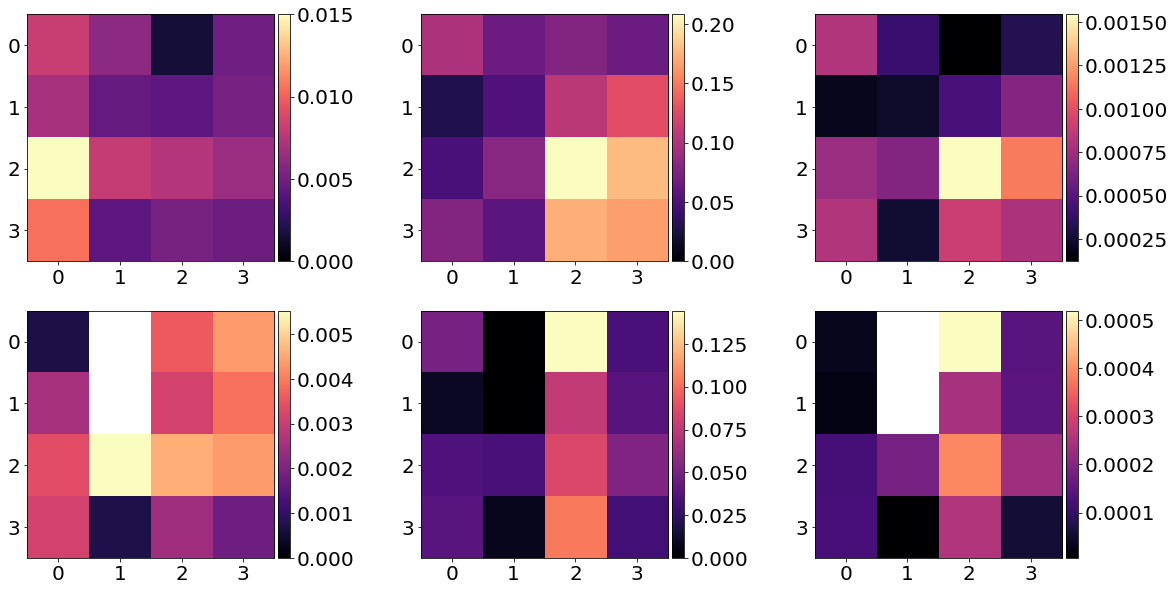

In [216]:
import matplotlib.gridspec as gs
from mpl_toolkits.axes_grid1 import make_axes_locatable

mv_wts_pos = np.nanmax(np.abs(mean_lyr_pos[:4,:4]))
mv_wts_neg = np.nanmax(np.abs(mean_lyr_pos[4:,4:]))

mv_nsyn_pos = np.nanmax(np.abs(nnz_lyr_pos))
mv_nsyn_neg = np.nanmax(np.abs(nnz_lyr_neg))

fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(2, 3, figure=fig, width_ratios=[1., 1., 1.])

arr_pos_list = [mean_lyr_pos[:4,:4], nnz_lyr_pos, mean_lyr_pos[:4,:4]*nnz_lyr_pos]
mval_pos_list = [mv_wts_pos, mv_nsyn_pos,None]

arr_neg_list = [np.abs(mean_lyr_pos[4:,4:]), nnz_lyr_neg, np.abs(mean_lyr_pos[4:,4:])*nnz_lyr_neg]
mval_neg_list = [mv_wts_neg, mv_nsyn_neg, None]

for ii, arr1, mv in zip(range(3), arr_pos_list, mval_pos_list):
    make_plot_on_gs(arr1, fig, gs[0,ii], cmap_val = 'magma', max_val = mv)
    
for ii, arr2, mv in zip(range(3), arr_neg_list, mval_neg_list):
    make_plot_on_gs(arr2, fig, gs[1,ii], cmap_val = 'magma', max_val = mv)

# ax0 = fig.add_subplot(gs[0,0])
# im0 = ax0.imshow(mean_lyr_pos, cmap = 'bwr', vmin = -mv_wts, vmax = mv_wts)
# divider = make_axes_locatable(ax0)
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im0, cax=cax, orientation='vertical')

In [91]:
tmp_df

,950939509,950939523,950939479,950942974,950939347,950939257
6,-0,0,0.0175187,0,-0,0.000821847
1,0,0,-0,-0,-0,-0.00272327
2,-0,0,0,0,-0,0.00180648
3,-0,0,0,0,0,-0.000236083
4,0,-0,-0,-0,-0,0.00109637
5,-0,0,-0,0,0,-0.00352672
7,0,-0,0,0,-0,-0
14,-0.00390057,-0,-0.00293868,0,0,0
9,-0.000886832,0,-0,0,-0,0.000221288
10,0,-0,0,-0,0,0.0150417


VISp VISp /Users/Ram/Dropbox/VC_NP_sklearn_mod/sandbox_save_prs/715093703/VISp/static_gratings/t1_0.15_t2_0.25_dt_0.005/max_test_corr /Users/Ram/Dropbox/VC_NP_sklearn_mod/sandbox_save_prs/715093703/VISp/static_gratings/t1_0.15_t2_0.25_dt_0.005/max_test_corr


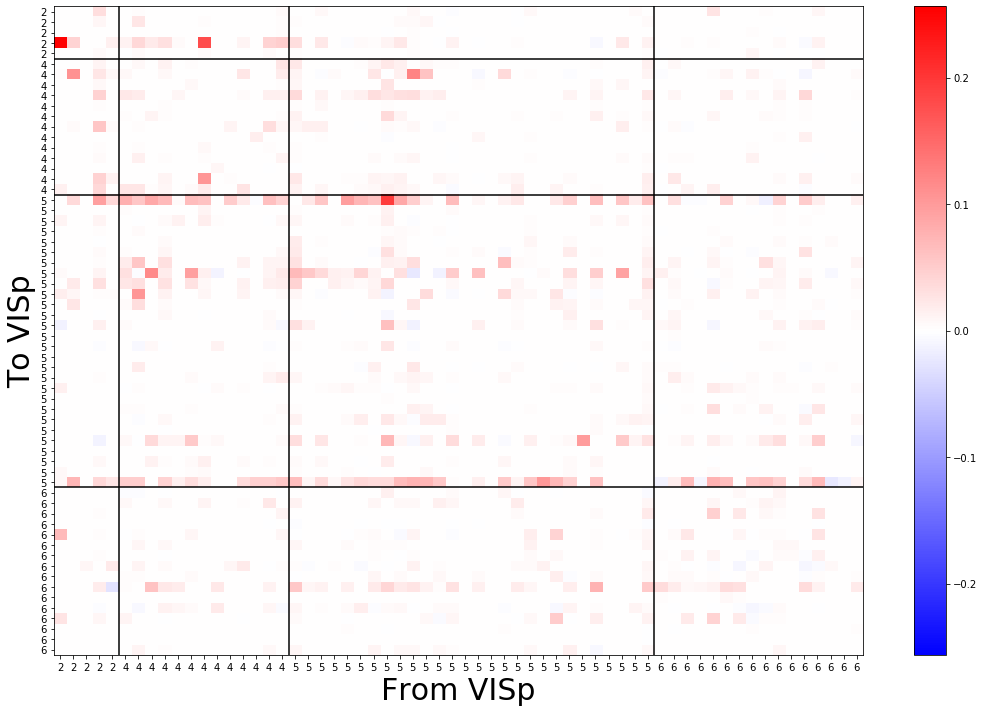

VISp VISl /Users/Ram/Dropbox/VC_NP_sklearn_mod/sandbox_save_prs/715093703/VISp/static_gratings/t1_0.15_t2_0.25_dt_0.005/max_test_corr /Users/Ram/Dropbox/VC_NP_sklearn_copy/glm_prs_with_vis_stim_for_cstr_corrected_scaling/715093703/VISl/static_gratings/dt_0.025/max_test_corr


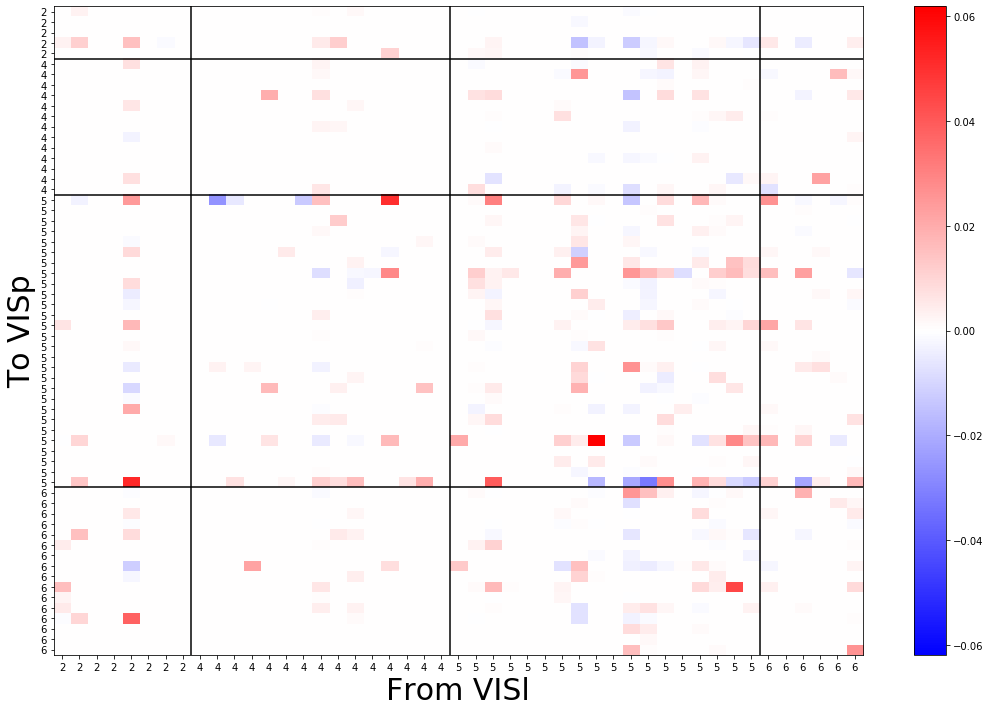

In [6]:
# #units_df_basedir = 'Y:/rami/Research/VC_NP_v2/units_dfs'
# #basedir = 'Y:/rami/Research/VC_NP_sklearn/glm_prs_with_vis_stim_for_cstr_smoothed'
# #basedir = 'Y:/rami/Research/VC_NP_sklearn/glm_prs_no_vis_stim_for_cstr_smoothed'

# units_df_basedir = '/Users/Ram/Dropbox/VC_NP_sklearn_copy/units_dfs'


# expt_id_list = ['715093703']#['719161530']#['715093703']#['719161530']#['715093703'] #,'719161530'
# split_frac = 0.5
# stim_name = 'static_gratings'



# basedir = '/Users/Ram/Dropbox/VC_NP_sklearn_mod/sandbox_save_prs'

# tmp_src_basedir = '/Users/Ram/Dropbox/VC_NP_sklearn_copy/glm_prs_with_vis_stim_for_cstr_corrected_scaling'
# tmp_dt = 0.025

# #vis_cols = ['VISp','VISam']#['VISp','VISam','VISl']#['LGd','LP','VISam','VISpm','VISp','VISl','VISal','VISrl']
# list_of_lists = [vis_cols, vis_cols]
# all_combs = list(itertools.product(*list_of_lists))

bin_dt = 0.005
bin_start = 0.15 #0.05#0.05
bin_end = 0.25 #0.15#0.15

cpl_mat_dict_p2 = {}

for expt_id in expt_id_list:
    #figs_savedir = os.path.join(basedir, expt_id, 'Figures')
    #figs_savedir = os.path.join(basedir, expt_id, 'dt_' + str(dt),'Figures')
    #if not os.path.exists(figs_savedir):
    #    os.makedirs(figs_savedir)
    for cc, comb in enumerate([all_combs[jj] for jj in [0,1]]):
        #try:
        tgt_cstr = comb[0]
        src_cstr = comb[1]

        units_savename = os.path.join(units_df_basedir,expt_id + '_units_df.pkl')
        units_df = pd.read_pickle(units_savename)

        #lyrs_dir = 'Y:/rami/data/NP_VC_data/layer_est_from_Jung/'
        lyrs_dir = '/Users/Ram/Dropbox/VC_NP_sklearn_copy/layer_est_from_Jung/'
        lyr_fname = os.path.join(lyrs_dir,expt_id+'_layer.json')
        with open(lyr_fname) as datafile:
            data = json.load(datafile)
        lyr_df = pd.DataFrame(data.items(), index = data.keys())
        
        if src_cstr != 'VISp':
            src_prs_df_dir = os.path.join(tmp_src_basedir, expt_id, src_cstr, stim_name, 'dt_'+str(tmp_dt), 'max_test_corr')
        else:
            src_prs_df_dir =  os.path.join(basedir, expt_id, src_cstr, \
           stim_name, 't1_'+str(bin_start) + '_t2_'+str(bin_end) + '_dt_'+str(bin_dt), 'max_test_corr')

        tgt_prs_df_dir =  os.path.join(basedir, expt_id, tgt_cstr, \
       stim_name, 't1_'+str(bin_start) + '_t2_'+str(bin_end) + '_dt_'+str(bin_dt), 'max_test_corr')
        
        print(tgt_cstr, src_cstr, tgt_prs_df_dir, src_prs_df_dir)

        src_tmp = get_cpl_lyr_df_for_given_cstr(units_df, lyr_df, src_cstr, src_prs_df_dir)
        tgt_tmp = get_cpl_lyr_df_for_given_cstr(units_df, lyr_df, tgt_cstr, tgt_prs_df_dir)

        cpl_mat = plot_cpl_matrix_hm(src_tmp, tgt_tmp, src_cstr, tgt_cstr, figs_savedir=None)#figs_savedir)
        cpl_mat_dict_p2[tgt_cstr,src_cstr] = cpl_mat
        #except Exception as e:
        #    print(e)
            

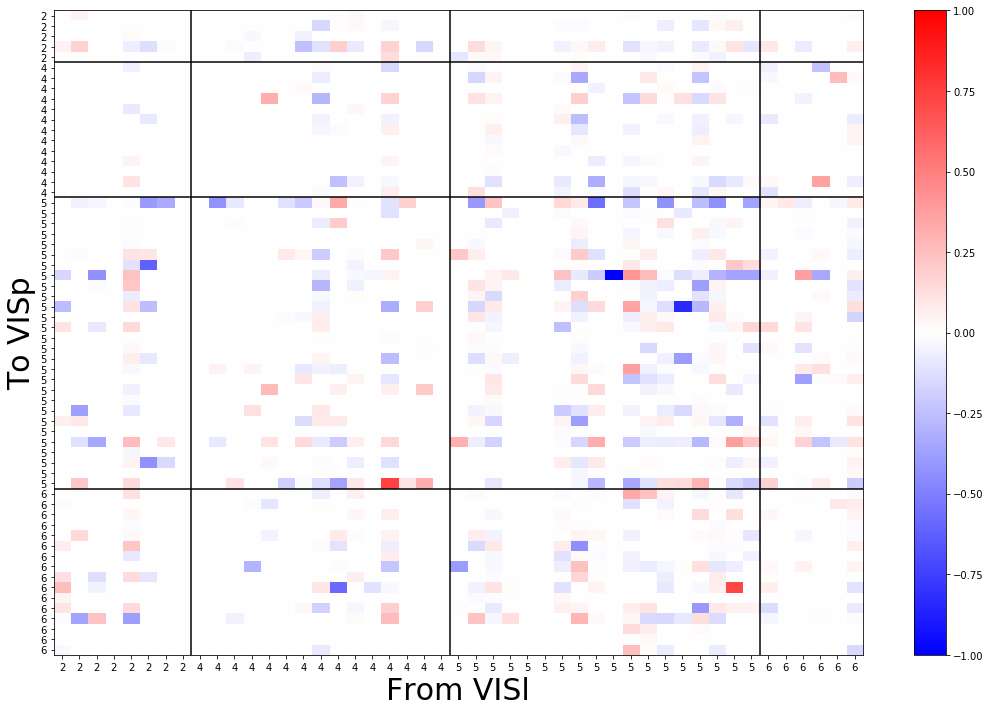

In [7]:
src_cstr = vis_cols[1]
tgt_cstr = vis_cols[0]
flag_norm = True #False
x = plot_diff_cpl_matrix(src_tmp, tgt_tmp, src_cstr, tgt_cstr, cpl_mat_dict_p1, cpl_mat_dict_p2, \
                         flag_norm = flag_norm, figs_savedir=None)

In [8]:
cpl_mat_dict_p1.keys()

dict_keys([('VISp', 'VISp'), ('VISp', 'VISl')])

In [9]:
[all_combs[jj] for jj in [0,1]]

[('VISp', 'VISp'), ('VISp', 'VISl')]

In [10]:
SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

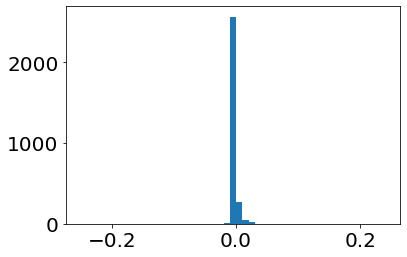

In [11]:
plt.figure()
plt.hist(cpl_mat.flatten(),bins = np.arange(-0.25,0.25,0.01))
plt.show()

('VISp', 'VISp')
0.3303850156087409 0.08506763787721124
0.011172576139677906 0.004471314859010683


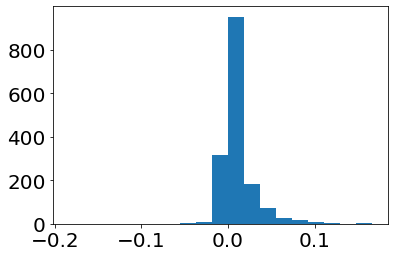

('VISp', 'VISl')
0.13109128345916266 0.060741249142072753
0.00408387925002869 0.001779149257972143


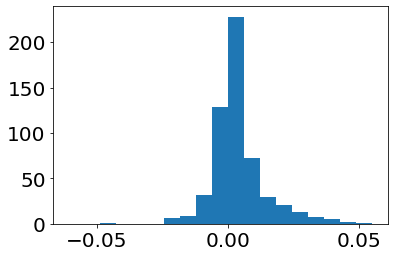

In [12]:
cpl_mat_dict = cpl_mat_dict_p1

for key in cpl_mat_dict.keys():

    cpl_vals_all = cpl_mat_dict[key].flatten()

    cpl_vals = cpl_vals_all[cpl_vals_all!=0]

    cpl_vals_pos = cpl_vals_all[cpl_vals_all>0]
    cpl_vals_neg = cpl_vals_all[cpl_vals_all<0]
    
    print(key)
    
    print(1.*len(cpl_vals_pos)/len(cpl_vals_all),1.*len(cpl_vals_neg)/len(cpl_vals_all))

    print(np.mean(cpl_vals), np.median(cpl_vals))

    val_min = np.amin(cpl_vals)
    val_max = np.amax(cpl_vals)
    max_abs = np.amax([np.abs(val_min), val_max])

    plt.figure()
    plt.hist(cpl_vals,bins = np.arange(-max_abs, max_abs,2*max_abs/20.))
    plt.show()

('VISp', 'VISp')
0.2921436004162331 0.05228928199791884
0.010781499254235737 0.004315644422240986


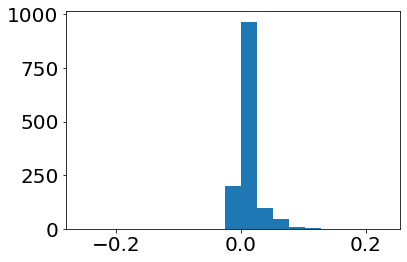

('VISp', 'VISl')
0.1153054221002059 0.05216197666437886
0.003404589142697334 0.0012089631462874144


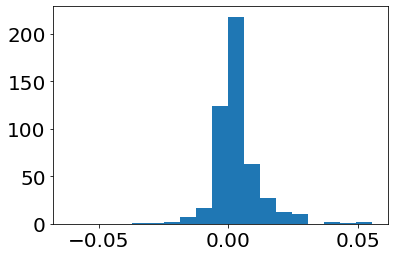

In [13]:
cpl_mat_dict = cpl_mat_dict_p2

for key in cpl_mat_dict.keys():

    cpl_vals_all = cpl_mat_dict[key].flatten()

    cpl_vals = cpl_vals_all[cpl_vals_all!=0]

    cpl_vals_pos = cpl_vals_all[cpl_vals_all>0]
    cpl_vals_neg = cpl_vals_all[cpl_vals_all<0]
    
    print(key)
    
    print(1.*len(cpl_vals_pos)/len(cpl_vals_all),1.*len(cpl_vals_neg)/len(cpl_vals_all))

    print(np.mean(cpl_vals), np.median(cpl_vals))

    val_min = np.amin(cpl_vals)
    val_max = np.amax(cpl_vals)
    max_abs = np.amax([np.abs(val_min), val_max])

    plt.figure()
    plt.hist(cpl_vals,bins = np.arange(-max_abs, max_abs,2*max_abs/20.))
    plt.show()

In [14]:
# import pylab
# for key in cpl_mat_dict.keys():

#     cpl_vals_all = cpl_mat_dict[key].flatten()

#     cpl_vals = cpl_vals_all[cpl_vals_all!=0]
    
#     fig = pylab.figure(figsize = (5,5))

#     boxprops = dict(linestyle='-', linewidth=3, color='b')
#     medianprops = dict(linestyle='-', linewidth=3, color='b')
#     whiskerprops = dict(linestyle='-',linewidth=3, color='b')

#     df=pd.DataFrame(np.array(cpl_vals))
#     box_plot=df.boxplot(boxprops=boxprops, whiskerprops = whiskerprops, medianprops = medianprops)

In [15]:
bins = np.arange(-0.25,0.25,0.05)
bins

array([-2.50000000e-01, -2.00000000e-01, -1.50000000e-01, -1.00000000e-01,
       -5.00000000e-02, -5.55111512e-17,  5.00000000e-02,  1.00000000e-01,
        1.50000000e-01,  2.00000000e-01])

In [16]:
plt.figure(figsize = (8,8))
plt.imshow(cpl_mat - cpl_mat.T, cmap = 'bwr')
plt.colorbar()
plt.show()

ValueError: operands could not be broadcast together with shapes (62,47) (47,62) 

<Figure size 576x576 with 0 Axes>

In [ ]:
np.count_nonzero(cpl_mat - cpl_mat.T), np.count_nonzero(cpl_mat), np.count_nonzero(cpl_mat.T),cpl_mat.shape

In [ ]:
tgt_tmp[['unit_id','layer'] + list(src_tmp.unit_id.values)]

In [ ]:
# vis_cols = ['LGd','LP','VISam','VISpm','VISp','VISl','VISal','VISrl']
# list_of_lists = [vis_cols, vis_cols]
# all_combs = list(itertools.product(*list_of_lists))
# all_combs